In [1]:
pip install fosforml

     |████████████████████████████████| 51kB 4.4MB/s eta 0:00:011
     |████████████████████████████████| 1.9MB 11.0MB/s eta 0:00:01
     |████████████████████████████████| 10.9MB 36.8MB/s eta 0:00:01
     |████████████████████████████████| 51kB 15.9MB/s eta 0:00:01
     |████████████████████████████████| 200.3MB 89kB/s /s eta 0:00:01
     |████████████████████████████████| 61kB 16.9MB/s eta 0:00:01
     |████████████████████████████████| 133kB 106.6MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/af/61/bcd9b58e38ead6ad42b9ed00da33a3f862bc1d445e3d3164799c25550ac2/pyarrow-17.0.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
     |████████████████████████████████| 2.5MB 76.7MB/s eta 0:00:01
     |████████████████████████████████| 98.7MB 145.0MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/e1/6a/4604f9ae2fa62ef47b9de2fa5ad599589d28c9fd1d335f32759813dfa91e/importlib_resources-6.4.5-py3-none-any.whl
  Using cached https://files.pytho

In [32]:
pip install seaborn

     |████████████████████████████████| 296kB 757kB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import fosforml
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()

In [3]:
my_session.connection.database

'ASSORTMENT_PLANNING'

In [4]:
my_session.connection.schema

'CPG_BRONZE'

In [5]:
table_name = "ASSORTMENT_PLANNING.CPG_BRONZE.SALES_CLEAN"

In [6]:
sf_df = my_session.sql("select * from {}".format(table_name))
type(sf_df)
df=sf_df.to_pandas()
type(df)

pandas.core.frame.DataFrame

In [7]:
df.head(5)

,MNTH_CODE,TRANS_DATE,START_DATE,SALES_VALUE,SALES_UNITS,SALES_VOLUME,SALES_PTR_VALUE,OC_CODE,DISTRIBUTOR_CODE,OUTLET_CODE,CITY,STATE,COUNTY,STREET,PRODUCT_CODE,CATEGORY,SUBCATEGORY,BRAND
0,202312,2023-12-26,2023-11-27,372.73,2,0.000650,372.727273,202212,DB0110,OL112848,Carbondale,Illinois,City Center,Str2,PRD0118,Soap,Medicated Soap,Burgundy
1,202312,2023-12-26,2023-11-27,436.36,3,0.000900,436.363636,202212,DB0110,OL112848,Carbondale,Illinois,City Center,Str2,PRD0131,Soap,Toilet Soap,Grape vine
2,202312,2023-12-24,2023-11-27,202.82,2,0.000214,209.090909,202212,DB0209,OL112555,Shelbyville,Tennessee,City Center,Str5,PRD0065,Hair Care,Hair Oil,Crimson
3,202312,2023-12-29,2023-11-27,142.86,16,0.000384,142.857143,202212,DB0655,OL113173,Renton,Washington,Orange,Str2,PRD0106,Hair Care,Shampoo,Hair & Shoulders
4,202312,2023-12-17,2023-11-27,145.45,1,0.000300,145.454545,202212,DB0652,OL112373,Wallingford,Connecticut,Dolphin,Str1,PRD0070,Perfume and Deodrants,Female Deodrant,Pista green


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966400 entries, 0 to 966399
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   MNTH_CODE         966400 non-null  int32  
 1   TRANS_DATE        966400 non-null  object 
 2   START_DATE        966400 non-null  object 
 3   SALES_VALUE       966400 non-null  float64
 4   SALES_UNITS       966400 non-null  int16  
 5   SALES_VOLUME      966400 non-null  float64
 6   SALES_PTR_VALUE   966400 non-null  float64
 7   OC_CODE           966400 non-null  int32  
 8   DISTRIBUTOR_CODE  966400 non-null  object 
 9   OUTLET_CODE       966400 non-null  object 
 10  CITY              966400 non-null  object 
 11  STATE             966400 non-null  object 
 12  COUNTY            966400 non-null  object 
 13  STREET            966400 non-null  object 
 14  PRODUCT_CODE      966400 non-null  object 
 15  CATEGORY          966400 non-null  object 
 16  SUBCATEGORY       96

## Generate Additional Features

In [9]:
import pandas as pd

def generate_features(df):
    # Ensure the TRANS_DATE column is in datetime format
    df['TRANS_DATE'] = pd.to_datetime(df['TRANS_DATE'])
    
    # Extract temporal features
    df['year'] = df['TRANS_DATE'].dt.year
    df['month'] = df['TRANS_DATE'].dt.month
    df['day'] = df['TRANS_DATE'].dt.day
    df['dayofweek'] = df['TRANS_DATE'].dt.dayofweek
    df['quarter'] = df['TRANS_DATE'].dt.quarter
    df['is_month_start'] = df['TRANS_DATE'].dt.is_month_start
    df['is_month_end'] = df['TRANS_DATE'].dt.is_month_end
    
    # Create UNIT_PTR feature
    df['UNIT_PTR'] = df['SALES_PTR_VALUE'] / df['SALES_UNITS']
    
    return df

In [10]:
df = generate_features(df)

In [11]:
df['PRODUCT_CODE'].nunique()

94

In [12]:
df = df.sort_values(by='TRANS_DATE')

In [13]:
# Convert all column names to uppercase
df.columns = [col.upper() for col in df.columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 966400 entries, 787515 to 905006
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   MNTH_CODE         966400 non-null  int32         
 1   TRANS_DATE        966400 non-null  datetime64[ns]
 2   START_DATE        966400 non-null  object        
 3   SALES_VALUE       966400 non-null  float64       
 4   SALES_UNITS       966400 non-null  int16         
 5   SALES_VOLUME      966400 non-null  float64       
 6   SALES_PTR_VALUE   966400 non-null  float64       
 7   OC_CODE           966400 non-null  int32         
 8   DISTRIBUTOR_CODE  966400 non-null  object        
 9   OUTLET_CODE       966400 non-null  object        
 10  CITY              966400 non-null  object        
 11  STATE             966400 non-null  object        
 12  COUNTY            966400 non-null  object        
 13  STREET            966400 non-null  object        
 14  PROD

In [15]:
df_sorted = df.sort_values(by=['OUTLET_CODE', 'PRODUCT_CODE', 'TRANS_DATE'])

In [16]:
pd.set_option('display.max_columns', None)

In [17]:
# List of columns in the desired order
columns_order = ['OUTLET_CODE', 'PRODUCT_CODE', 'TRANS_DATE', 'UNIT_PTR'] + [col for col in df_sorted.columns if col not in ['OUTLET_CODE', 'PRODUCT_CODE']]

# Reorder the DataFrame columns
df_sorted = df_sorted[columns_order]

In [18]:
df_sorted['FREQUENCY'] = df_sorted.groupby(['OUTLET_CODE', 'PRODUCT_CODE']).cumcount() + 1

In [19]:
df_sorted.head()

,OUTLET_CODE,PRODUCT_CODE,TRANS_DATE,UNIT_PTR,MNTH_CODE,TRANS_DATE,START_DATE,SALES_VALUE,SALES_UNITS,SALES_VOLUME,SALES_PTR_VALUE,OC_CODE,DISTRIBUTOR_CODE,CITY,STATE,COUNTY,STREET,CATEGORY,SUBCATEGORY,BRAND,YEAR,MONTH,DAY,DAYOFWEEK,QUARTER,IS_MONTH_START,IS_MONTH_END,UNIT_PTR,FREQUENCY
219329,OL10328,PRD0014,2023-12-08,17.857143,202312,2023-12-08,2023-11-27,107.14,6,0.000312,107.142857,202212,DB0110,Durham,North Carolina,Santa Cruz,Str5,Dental,ToothPaste,Toothy Sensitive,2023,12,8,4,4,False,False,17.857143,1
512107,OL10328,PRD0058,2023-10-06,4.464286,202310,2023-10-06,2023-10-02,53.57,12,0.000132,53.571429,202210,DB0110,Durham,North Carolina,Santa Cruz,Str5,Soap,Liquid Soap,Rust,2023,10,6,4,4,False,False,4.464286,1
117235,OL10328,PRD0064,2024-04-21,99.090909,202404,2024-04-21,2024-04-03,198.18,2,0.000214,198.181818,202204,DB0110,Durham,North Carolina,Santa Cruz,Str5,Hair Care,Conditioner,Bamboo,2024,4,21,6,2,False,False,99.090909,1
475887,OL10328,PRD0064,2024-07-14,104.545455,202407,2024-07-14,2024-07-03,101.41,1,0.000107,104.545455,202207,DB0110,Durham,North Carolina,Santa Cruz,Str5,Hair Care,Conditioner,Bamboo,2024,7,14,6,3,False,False,104.545455,2
431721,OL10328,PRD0064,2024-07-21,104.545455,202407,2024-07-21,2024-07-03,209.09,2,0.000214,209.090909,202207,DB0110,Durham,North Carolina,Santa Cruz,Str5,Hair Care,Conditioner,Bamboo,2024,7,21,6,3,False,False,104.545455,3


Split the dataset into test and train

K means clustering of OUTLET_CODES

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def label_encode_dataframe(df, columns_to_encode):
    # Initialize the label encoder
    label_encoder = LabelEncoder()
    
    # Apply label encoding to each column
    for column in columns_to_encode:
        df[column + '_encoded'] = label_encoder.fit_transform(df[column])
    
    # Convert all column names to uppercase and replace spaces with underscores
    df.columns = df.columns.str.upper().str.replace(' ', '_')
    
    return df

In [21]:
columns_to_encode = ['PRODUCT_CODE', 'CATEGORY', 'SUBCATEGORY', 'BRAND']
df_sorted = label_encode_dataframe(df_sorted, columns_to_encode)

In [22]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 966400 entries, 219329 to 278374
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   OUTLET_CODE           966400 non-null  object        
 1   PRODUCT_CODE          966400 non-null  object        
 2   TRANS_DATE            966400 non-null  datetime64[ns]
 3   UNIT_PTR              966400 non-null  float64       
 4   MNTH_CODE             966400 non-null  int32         
 5   TRANS_DATE            966400 non-null  datetime64[ns]
 6   START_DATE            966400 non-null  object        
 7   SALES_VALUE           966400 non-null  float64       
 8   SALES_UNITS           966400 non-null  int16         
 9   SALES_VOLUME          966400 non-null  float64       
 10  SALES_PTR_VALUE       966400 non-null  float64       
 11  OC_CODE               966400 non-null  int32         
 12  DISTRIBUTOR_CODE      966400 non-null  object        
 13 

In [23]:
df_sorted = df_sorted.loc[:, ~df_sorted.columns.duplicated()]

In [24]:
# Aggregation dictionary
aggregation_dict = {
    'SALES_UNITS': 'mean',
    'UNIT_PTR': 'mean',
    'FREQUENCY': 'count',
    'PRODUCT_CODE_ENCODED': 'mean'
}

# Aggregate data by OUTLET_CODE
aggregated_df = df_sorted.groupby('OUTLET_CODE').agg(aggregation_dict).reset_index()

In [25]:
# Select features for clustering
features = ['SALES_UNITS', 'UNIT_PTR', 'FREQUENCY', 'PRODUCT_CODE_ENCODED']

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['SALES_UNITS', 'UNIT_PTR', 'FREQUENCY', 'PRODUCT_CODE_ENCODED']),
        # No need to preprocess category columns as they are already one-hot encoded
    ],
    remainder='passthrough'  # Keep the one-hot encoded columns as they are
)

In [27]:
df_sorted_preprocessed = preprocessor.fit_transform(aggregated_df[features])

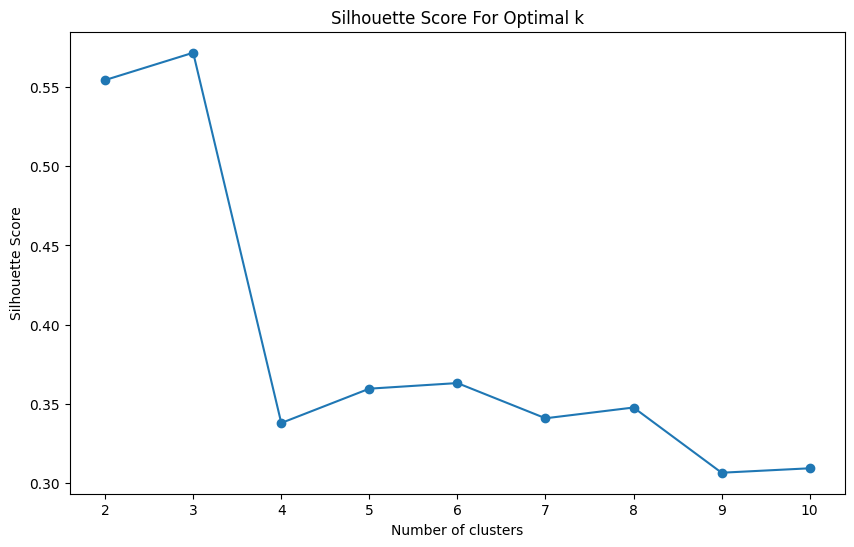

In [28]:
# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
k_range = range(2, 11)  # Silhouette score is not defined for k=1
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_sorted_preprocessed)
    silhouette_avg = silhouette_score(df_sorted_preprocessed, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

In [29]:
# Apply K-Means clustering with the chosen number of clusters 
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]  # Choose the k with the highest silhouette score
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
aggregated_df['CLUSTER'] = kmeans.fit_predict(df_sorted_preprocessed)

# Display the first few rows to verify
print(aggregated_df.tail())

      OUTLET_CODE  SALES_UNITS    UNIT_PTR  FREQUENCY  PRODUCT_CODE_ENCODED  \
18828     OL97620     7.322404   94.301238        183             51.519126   
18829     OL97621    11.039474  110.612184         76             43.473684   
18830     OL97622    12.266667   24.139610         15             50.933333   
18831     OL97623    15.448276    6.588670         29             48.896552   
18832     OL97624    13.333333    5.952381         12             43.833333   

       CLUSTER  
18828        2  
18829        2  
18830        0  
18831        0  
18832        0  


In [30]:
aggregated_df.to_csv('outlet_to_cluster_mapping.csv', index=False)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example visualization Clusters of SALES_UNITS VS SALES_VALUE
sns.scatterplot(x='SALES_UNITS', y='FREQUENCY', hue='CLUSTER', data=aggregated_df)
plt.title('Clusters of OUTLET_CODE')
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
df_sorted.head()

In [ ]:
df_sorted=df_sorted.merge(aggregated_df[['OUTLET_CODE', 'CLUSTER']], on='OUTLET_CODE', how='left')

In [ ]:
df_sorted.to_csv('HistoricalSales_with_cluster.csv', index=False)

In [ ]:
unique_product_codes = df['PRODUCT_CODE'].unique()
df_unique_product_codes = pd.DataFrame(unique_product_codes, columns=['PRODUCT_CODE'])

unique_outlet_codes = df['OUTLET_CODE'].unique()
df_unique_outlet_codes = pd.DataFrame(unique_outlet_codes, columns=['OUTLET_CODE'])

df_all_combinations = df_unique_product_codes.merge(df_unique_outlet_codes, how='cross')

current_selling = df_sorted[['PRODUCT_CODE', 'OUTLET_CODE']].drop_duplicates()

In [ ]:
# Assuming df_all_combinations and unique_combinations are your DataFrames
# Merge the DataFrames with an indicator
merged_df = df_combinations.merge(current_selling, on=['PRODUCT_CODE', 'OUTLET_CODE'], how='left', indicator=True)

# Filter the rows that are present in df_combinations but not in unique_combinations
diff_df = merged_df[merged_df['_merge'] == 'left_only'].drop(columns=['_merge'])


In [ ]:
diff_df.info()

In [ ]:
diff_df=diff_df.merge(aggregated_df[['OUTLET_CODE', 'CLUSTER']], on='OUTLET_CODE', how='left')

In [ ]:
diff_df.to_csv('Not_selling.csv', index=False)